In this, I implement RNN based next-word prediction model using Sherlock Holmes' play as the training data.

I first preprocess the data for setting it up for training the model.Then I build the RNN model and train it on the data given. It then gives out the training graph. At last, there is method to take in user sentences as input and output the next predicted output.



# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Embedding, SimpleRNN, Dense, Bidirectional


# Data's Preprocessing


This reads the text file and converts all text to lowercase and splitting it by newline characters



In [ ]:
FILE = 'Desktop/Data.txt'

with(open(FILE, 'r')) as f:
    data = f.read().lower().split('\n')

#data

Tokenizer is used here to tokenize the dataset. It creates a dictionary of words with their corresponding index and total words in the vocab are calculated

In [ ]:
tkn = Tokenizer()
tkn.fit_on_texts(data)
total_words = len(tkn.word_index) + 1
#data[1]

The text data is converted into sequence of integers, where each word is represented by its index in tokenizer's word index

In [ ]:
input_seq = []

for s in seq:
  for i in range(1, len(s)):
    n_seq = s[:i+1]
    input_seq.append(n_seq)

Creating input-output pairs for the data. The input data(X) consists of all words except the last one in each sequence, while the target data(y) consists of the last word in the sequence

In [ ]:
max_seq_len = max([len(x) for x in input_seq])
input_seq = pad_sequences(input_seq, maxlen = max_seq_len, padding = 'pre')

X, y = input_seq[:, :-1], input_seq[:, -1]
y = to_categorical(y, num_classes=total_words)

#print(X.shape)
#print(y)

# Building the RNN Model

This build the RNN Model
*   `sequential()` initializes a linear stack of layers.

*   `Embedding(total_words, 100, input_length=max_sequence_len-1)` creates an embedding layer that maps each word index to a 100-dimensional vector. `total_words` is the size of the vocab, and `input_length` is the length of input sequences.

*   `SimpleRNN(150)` adds a SimpleRNN layer with 150 units. This layer processes the sequence data.

*   `Dense(total_words, activation='softmax')` adds a dense layer with a softmax activation function, which outputs a probability distribution over the vocabulary for the next word prediction.

Then the model is compiled with `categorical_crossentropy` loss and `adam` optimizer. Summary is then generated.

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_seq_len-1))
model.add(SimpleRNN(150))
model.add(Dense(total_words, activation='softmax'))

model.build(input_shape=(None, max_seq_len-1))
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_19 (Embedding)        │ (None, 19, 100)        │       893,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_18 (SimpleRNN)       │ (None, 150)            │        37,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 8932)           │     1,348,732 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,279,582 (8.70 MB)

 Trainable params: 2,279,582 (8.70 MB)

 Non-trainable params: 0 (0.00 B)

# Model Training

Here, model is trained on the data

*   `model.fit` trains model on X and Y inputs
*   `epochs=50` specifies the model will be trained for 50 epochs
*   `batch_size=64` specifies the model will process 64 samples at a time.
*   `verbose=1` prints the training progress



In [ ]:
history = model.fit(X, y, epochs=50, batch_size=64, verbose=1)

Epoch 1/50
1588/1588 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.0631 - loss: 6.6028
Epoch 2/50
1588/1588 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.1284 - loss: 5.4318
Epoch 3/50
1588/1588 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.1585 - loss: 4.9512
Epoch 4/50
1588/1588 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.1819 - loss: 4.5682
Epoch 5/50
1588/1588 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.2040 - loss: 4.2489
Epoch 6/50
1588/1588 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.2326 - loss: 3.9565
Epoch 7/50
1588/1588 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.2646 - loss: 3.6914
Epoch 8/50
1588/1588 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.3049 - loss: 3.4128
Epoch 9/50
1588/1588 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.3388 - loss: 3.1928
Epoch 10/50
1588/1588 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.3732 - loss: 2.9851
Epoch 11/50
1588/1588 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.4050 - loss: 2.7998
Epoch 12

Plotting the training performance

# Graphs and User inputs

The graph between 'accuracy' and 'loss' is plotted for the training

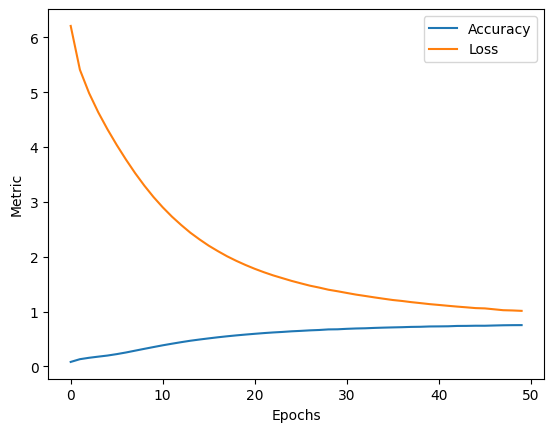

In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Metric')
plt.legend()
plt.show()



This has the method `predict_word` which is used to predict the next word in a sequence.

Then the user input is taken and next word is printed.

In [ ]:
def predict_word(model, tkn, input_text, max_seq_len):
    input_seq = tkn.texts_to_sequences([input_text])[0]
    sequence = pad_sequences([input_seq], maxlen=max_seq_len-1, padding='pre')
    predicted = model.predict(sequence, verbose=0)

    predicted_word = ''
    for word, index in tkn.word_index.items():
        if index == np.argmax(predicted):
            predicted_word = word
            break
    return predicted_word

user_input = input("Enter the line: ")
predict_word = predict_word(model, tkn, user_input, max_seq_len)
print("Predicted Word: " + predict_word)


Enter the line: Your name is Sherlock...?
Predicted Word: holmes


This model now predicts the next word based on the trained data for whatever the sentence or word the user inputs. This reflects ability of RNNs to learn word relations and generate predictions base on patterns.

Some Sample Runs:

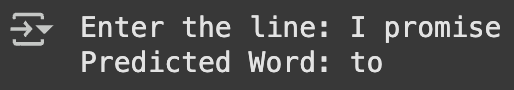


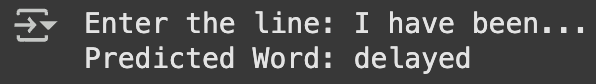


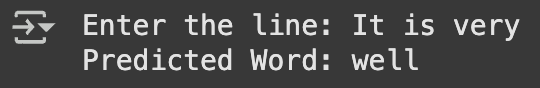
